In [19]:
def calc_rms(df_2dlist, key, overlap_plots = False):
    """
    Argument
    ---------
    df_2dlist:
        2D list of PandasDataFrame
    Returns
    --------
    rms_matrix
    """
    rms_matrix = np.zeros((len(df_2dlist[0]), len(df_2dlist), len(df_2dlist)))
    if key == 'pose.pose.position.x':
        ylabel = 'X-coordinate [m]'
    elif key== 'pose.pose.position.y':
        ylabel = 'Y-coordinaye [m]'
    elif key == 'linear.x':
        ylabel = 'Speed [m/s]'
    else:
        ylabel = 'Message'
    figa = []
    axa = []
    if overlap_plots:
        for kp in range(0, len(df_2dlist[0])):
            f, a = plt.subplots(len(df_2dlist), len(df_2dlist))
            f.set_figheight(f.get_figheight()*2)
            f.set_figwidth(f.get_figwidth()*2)
            figa.append(f)
            axa.append(a)
        sns.set_context("paper")
    # rms_matrix_msgs = np.zeros((len(df_2dlist[0]), len(df_2dlist), len(df_2dlist)))
    for ii in range(0, len(df_2dlist)):
        for jj in range(0, len(df_2dlist)):
            if (ii >= jj):
                for vehicle  in range(0,len(df_2dlist[0])):
                    axa[vehicle][ii,jj].axis('off')
                continue
            df1 = pd.DataFrame()
            df2 = pd.DataFrame()
            # use speed for calculating shift
            df1['Time'] = speed[ii][0]['Time'].iloc[:-25] - speed[ii][0]['Time'].iloc[0]
            df1['Message'] = speed[ii][0]['linear.x'].iloc[:-25] # remove last 25 points when sim starts breaking down
            df2['Time'] = speed[jj][0]['Time'].iloc[:-25] - speed[jj][0]['Time'].iloc[0]
            df2['Message'] = speed[jj][0]['linear.x'].iloc[:-25] # remove last 25 points when sim starts breaking down
            df1new, df2new = strymread.ts_sync(df1, df2, rate ='first', method = 'nearest')      
            shift = strymread.time_shift(df1new,df2new,correlation_threshold=0.9)
            for vehicle  in range(0,len(df_2dlist[0])):
                df1 = pd.DataFrame()
                df2 = pd.DataFrame()
                df1['Time'] = df_2dlist[ii][vehicle]['Time'].iloc[:-25] - df_2dlist[ii][vehicle]['Time'].iloc[0]
                df1['Message'] = df_2dlist[ii][vehicle][key].iloc[:-25] # remove last 25 points when sim starts breaking down
                df2['Time'] = df_2dlist[jj][vehicle]['Time'].iloc[:-25] - df_2dlist[jj][vehicle]['Time'].iloc[0]
                df2['Message'] = df_2dlist[jj][vehicle][key].iloc[:-25] # remove last 25 points when sim starts breaking down
                df2['Time'] = df2['Time']+shift
                df1new, df2new = strymread.ts_sync(df1, df2, rate ='first', method = 'nearest')
                if overlap_plots:
                    #fig, ax = bagpy.create_fig(1)
                    sns.lineplot(x = 'Time', y = 'Message', data = df1new, linewidth= 1.5, label='Sim {}, Vehicle {}'.format(ii, vehicle), ax = axa[vehicle][ii,jj])
                    sns.lineplot(x = 'Time', y = 'Message', data = df2new, linewidth = 1.0, linestyle='--', label='Sim {}, Vehicle {}'.format(jj, vehicle), ax = axa[vehicle][ii,jj])
                    axa[vehicle][ii,jj].set_xlabel('Time [s]')
                    axa[vehicle][ii,jj].set_ylabel(ylabel)
                    axa[vehicle][ii,jj].legend()
                    #fig.show()  
                # shift = strymread.time_shift(df1new,df2new,correlation_threshold=0.9)
                RMSf = (df1new['Message'] - df2new['Message'])**2  + (df1new['Time'] - df2new['Time'])**2  
                RMSf_MSG = (df1new['Message'] - df2new['Message'])**2 
                RMS = np.sqrt( np.mean(RMSf.values))
                # RMS_MSG = np.sqrt( np.mean(RMSf_MSG.values))
                rms_matrix[vehicle][ii][jj] = RMS
                # rms_matrix_msgs[vehicle][ii][jj] = RMS_MSG
    if overlap_plots:
        for vehicle  in range(0,len(df_2dlist[0])):
            figa[vehicle].tight_layout()
            figa[vehicle].show()
    return rms_matrix

[2022_01_03_01_59_08] (root) INFO: Zero pass correlation coefficient  = (0.9999951917066303, 0.0)
[2022_01_03_01_59_15] (root) INFO: Zero pass correlation coefficient  = (0.9999803078445964, 0.0)
[2022_01_03_01_59_25] (root) INFO: Zero pass correlation coefficient  = (0.9999822077346595, 0.0)


/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:73: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



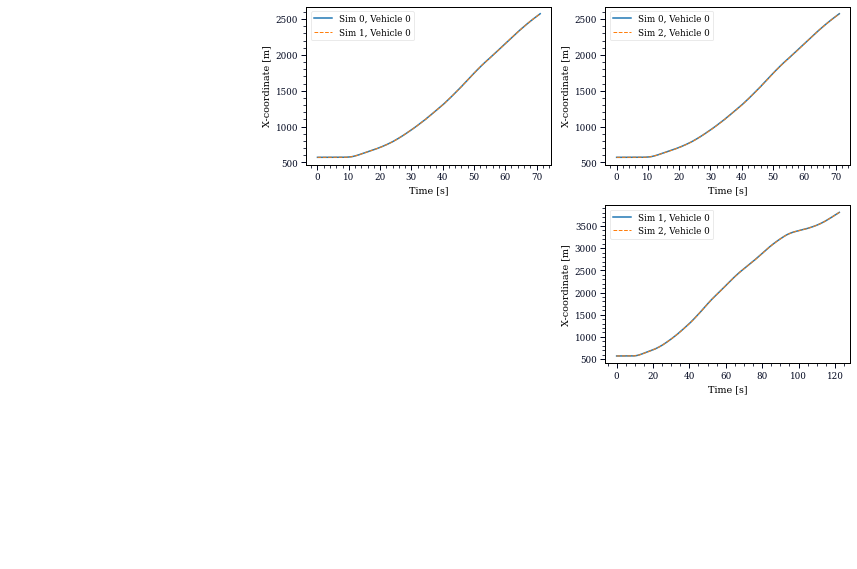

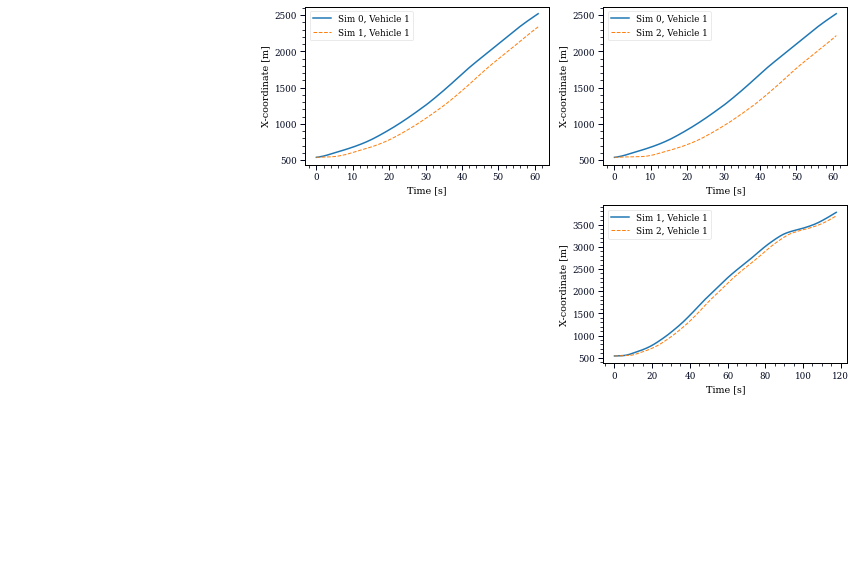

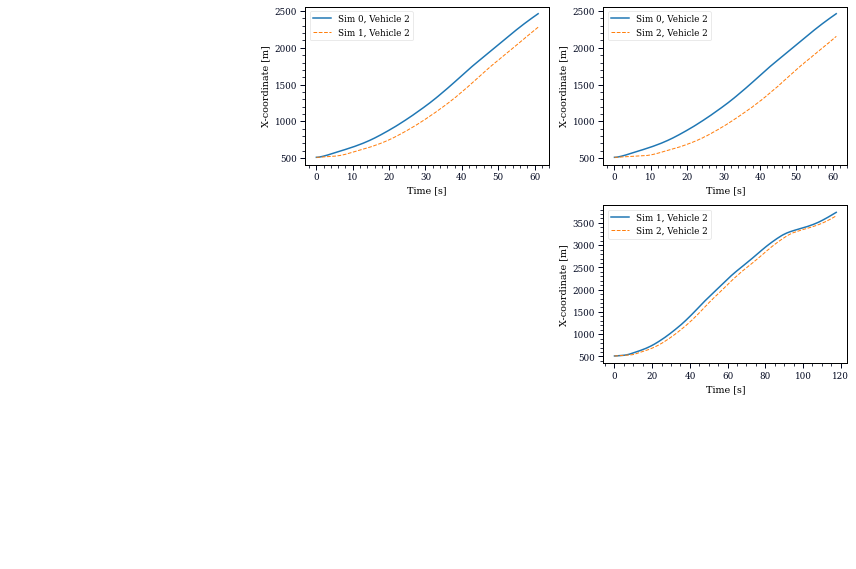

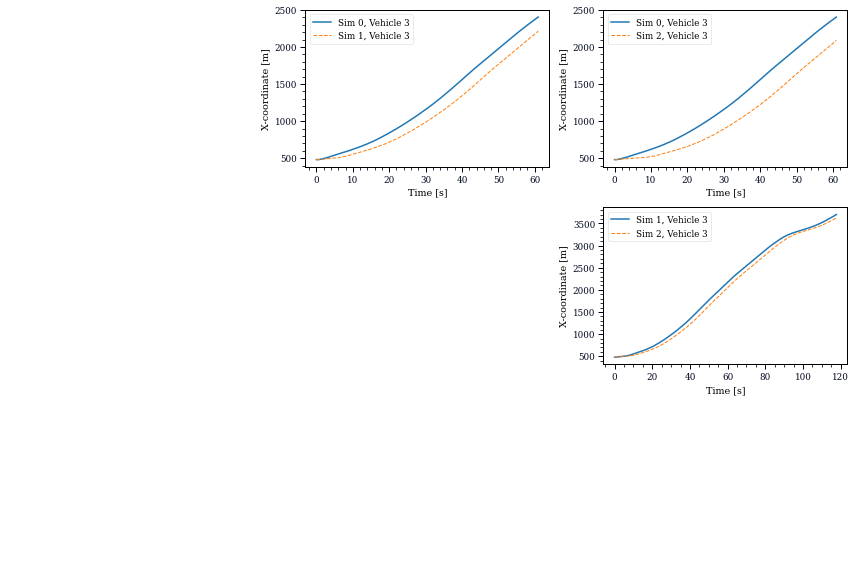

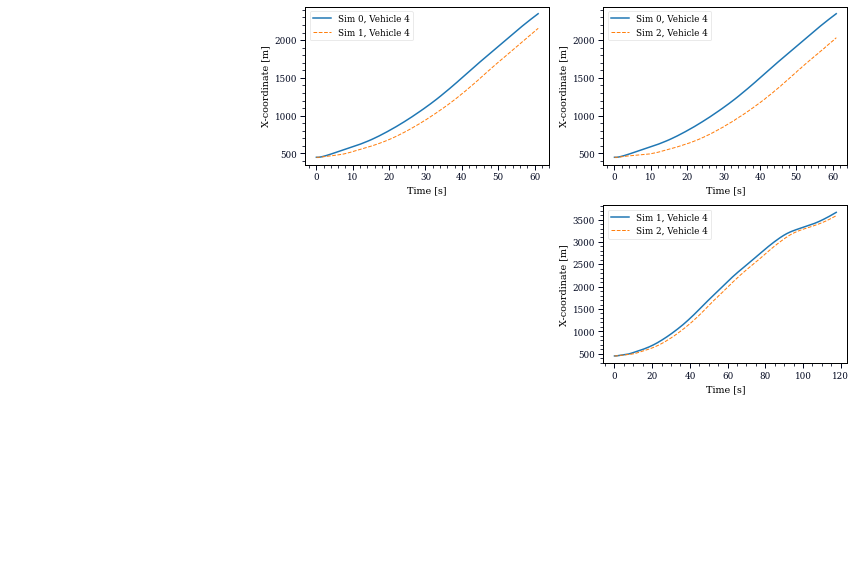

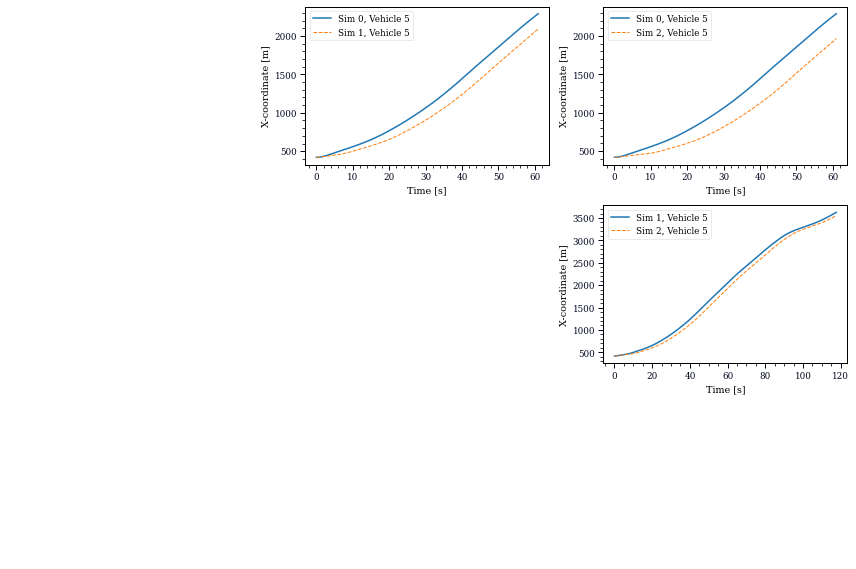

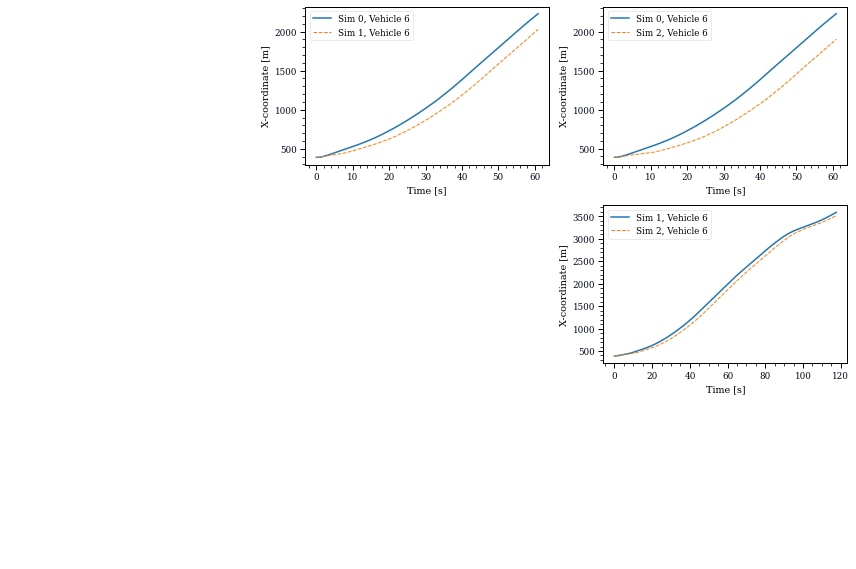

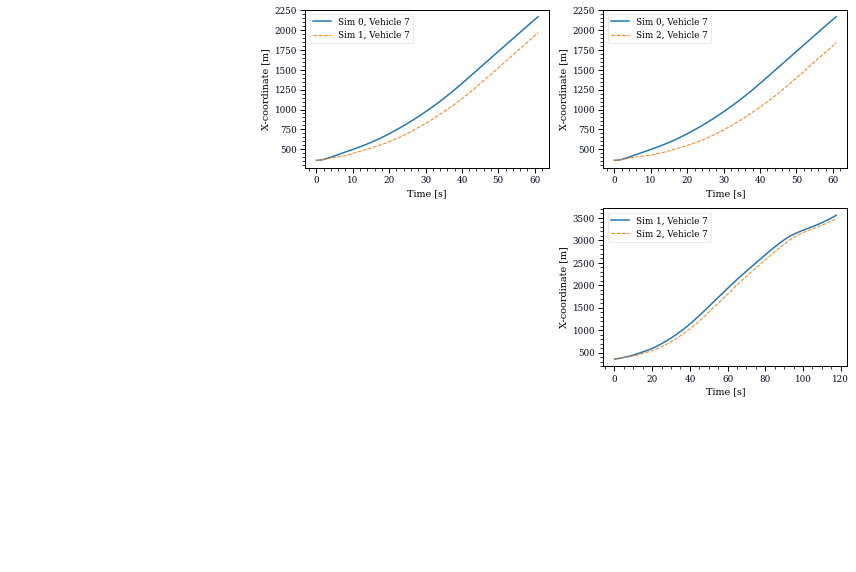

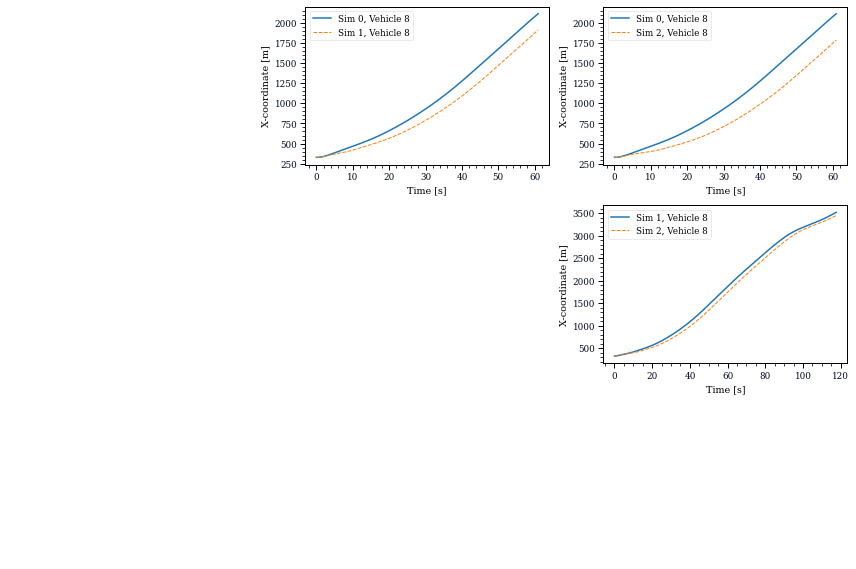

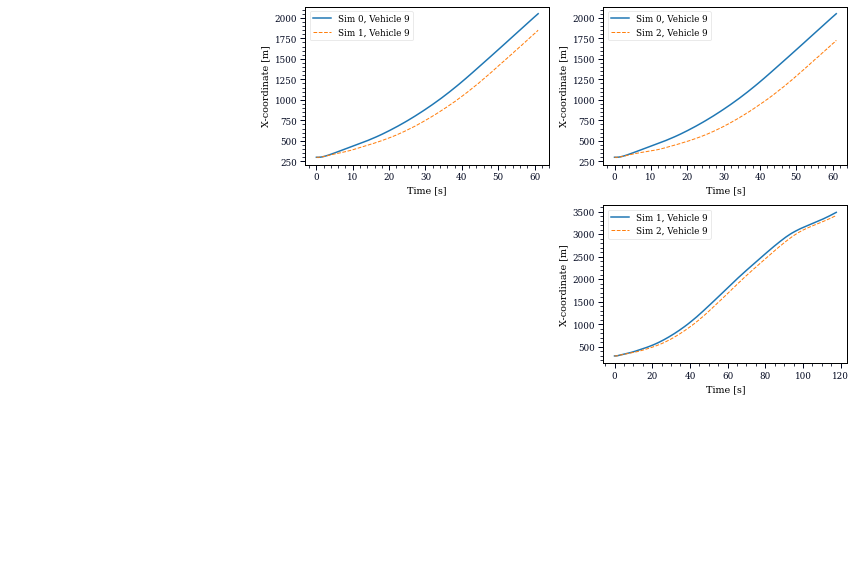

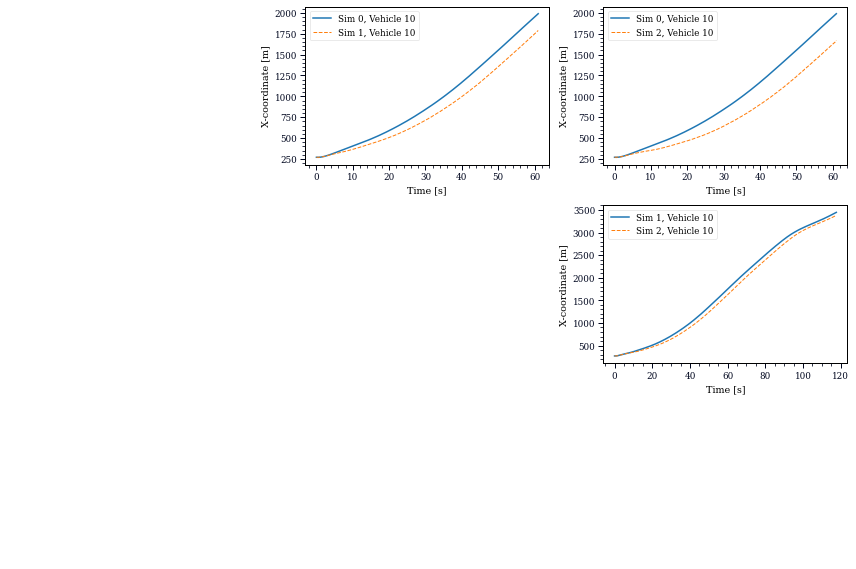

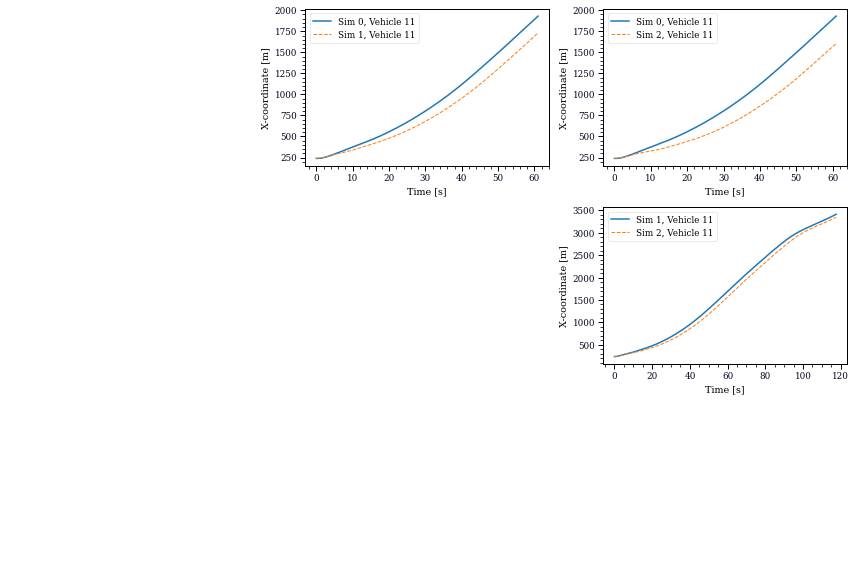

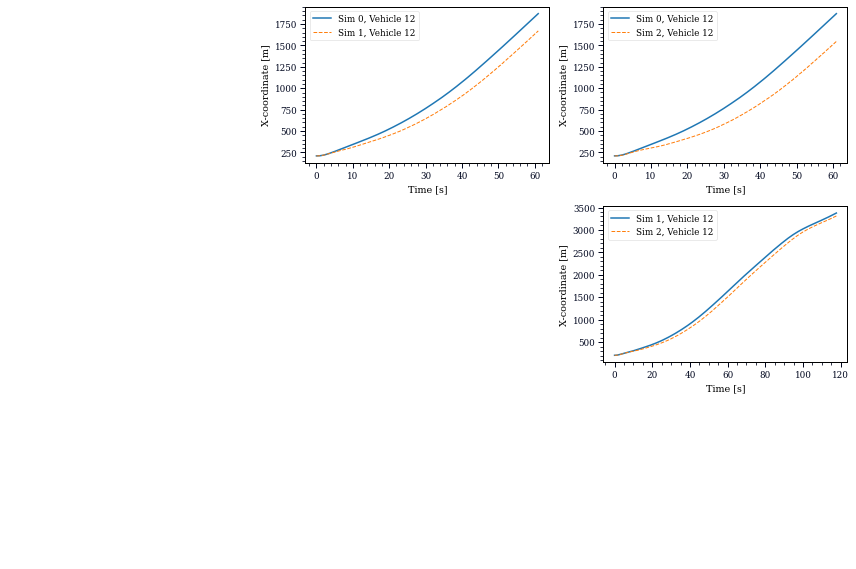

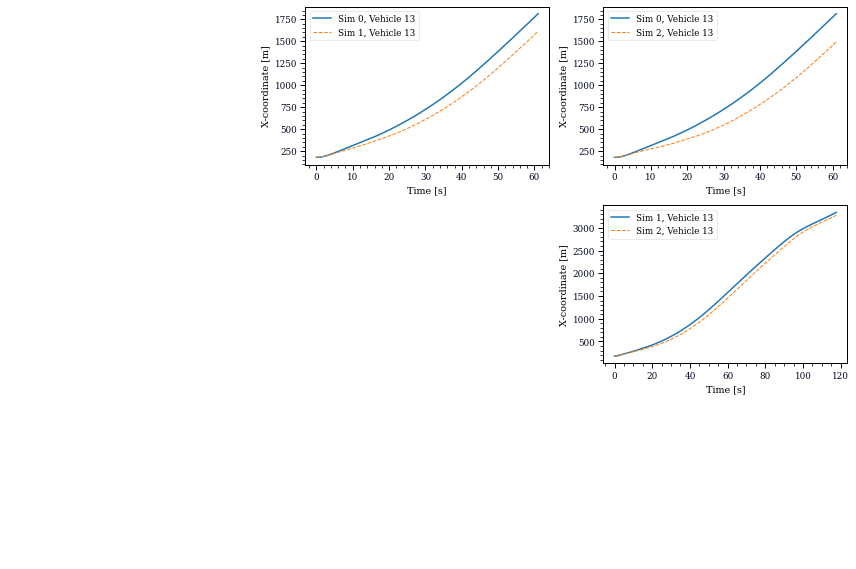

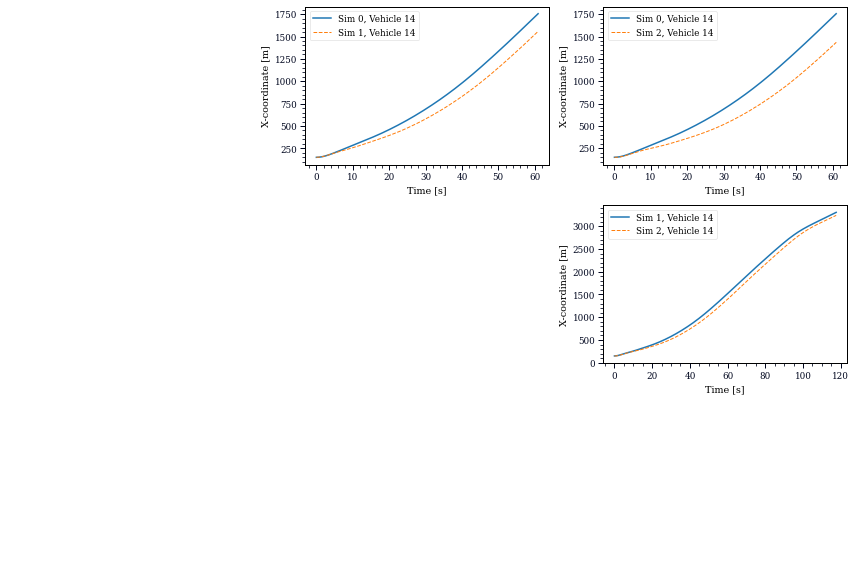

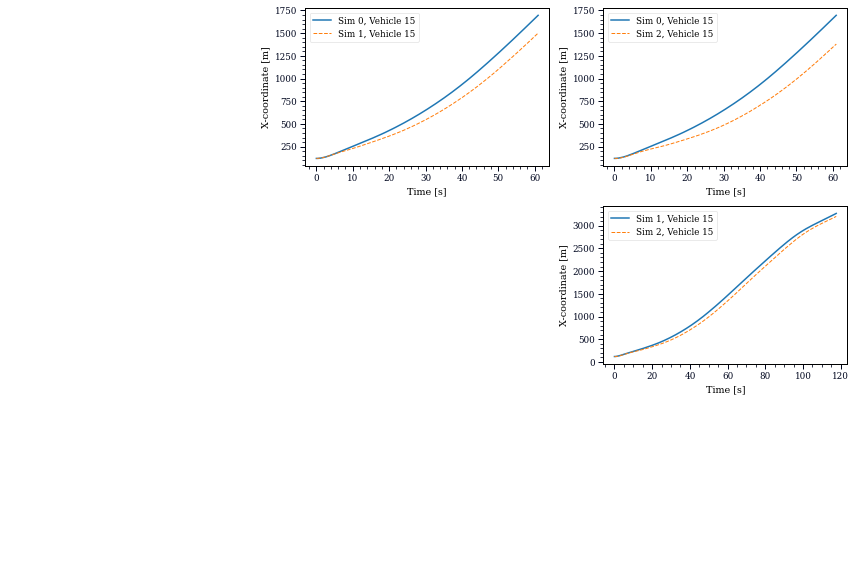

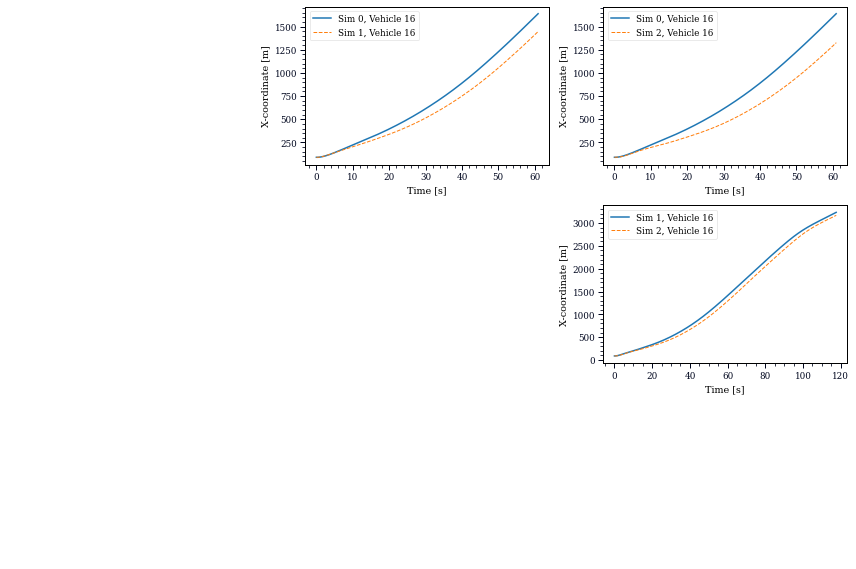

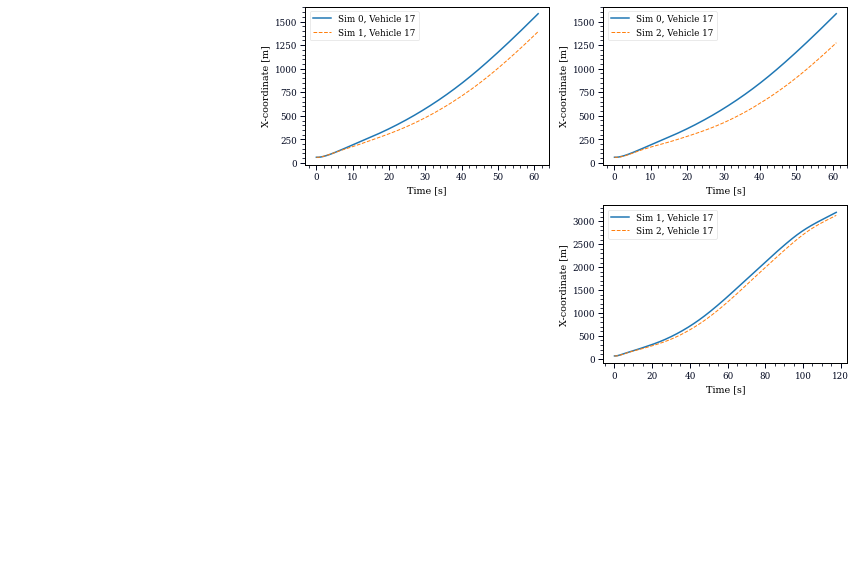

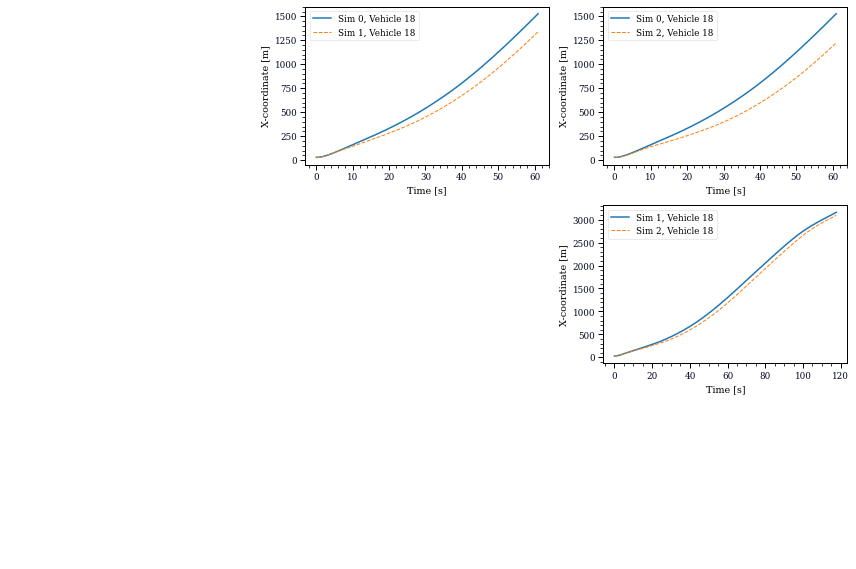

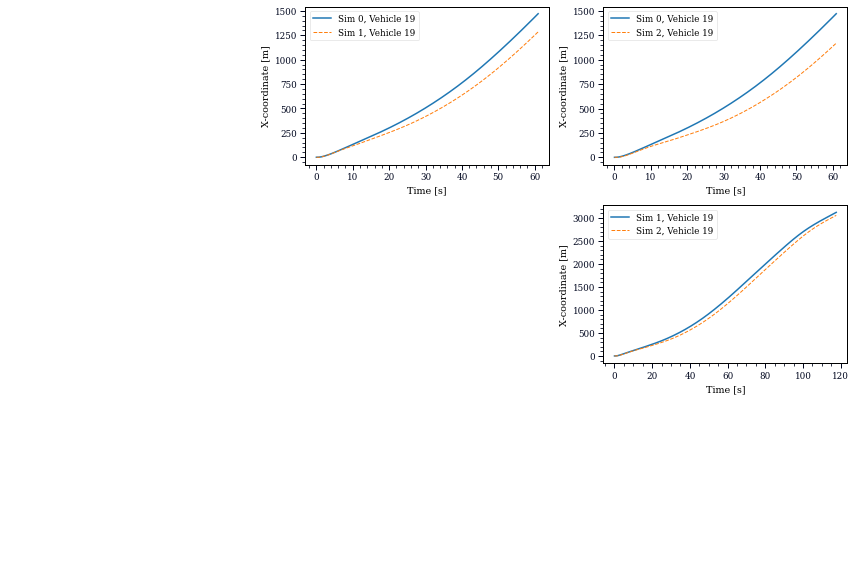

In [20]:
rms_matrix_posX  = calc_rms(posX, key='pose.pose.position.x', overlap_plots = True)

[2022_01_03_02_00_38] (root) INFO: Zero pass correlation coefficient  = (0.9999951917066303, 0.0)
[2022_01_03_02_00_45] (root) INFO: Zero pass correlation coefficient  = (0.9999803078445964, 0.0)
[2022_01_03_02_00_51] (root) INFO: Zero pass correlation coefficient  = (0.9999822077346595, 0.0)


/home/refulgent/VersionControl/sparkle_python/notebooks/sparkle_analysis.py:73: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



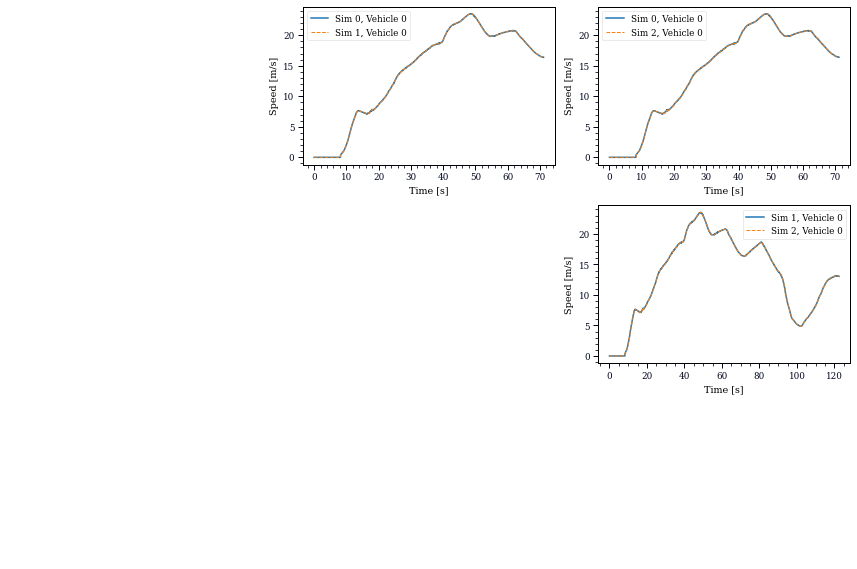

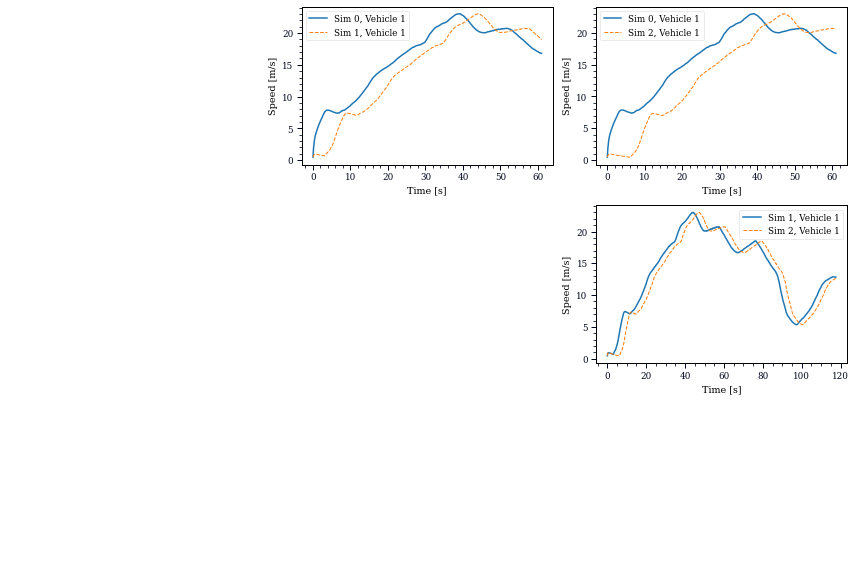

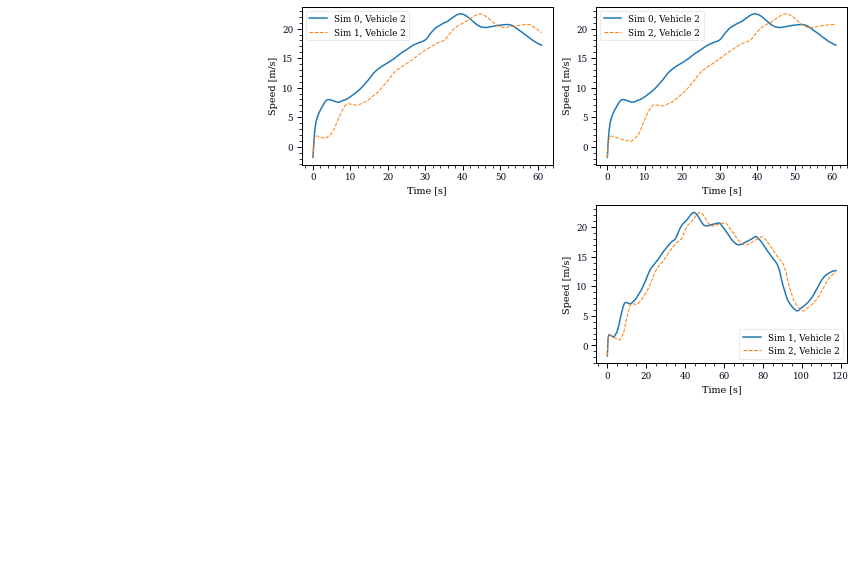

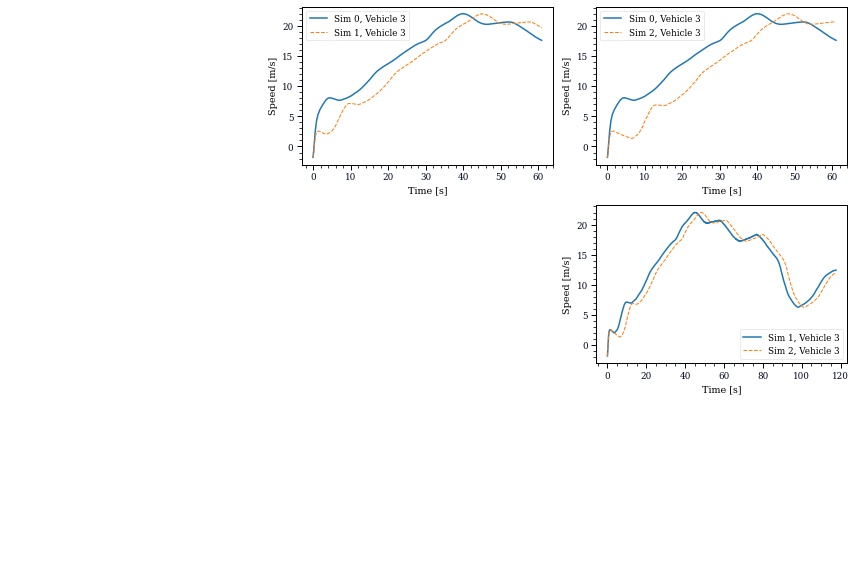

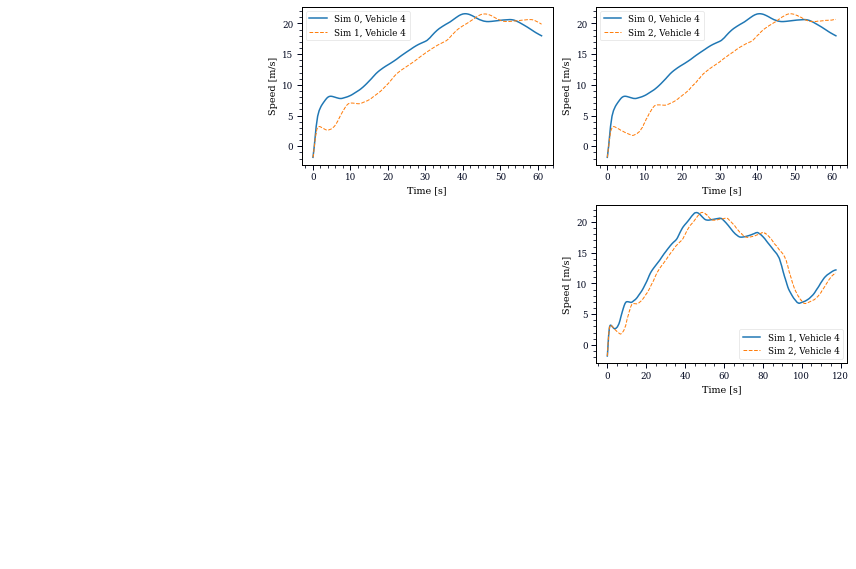

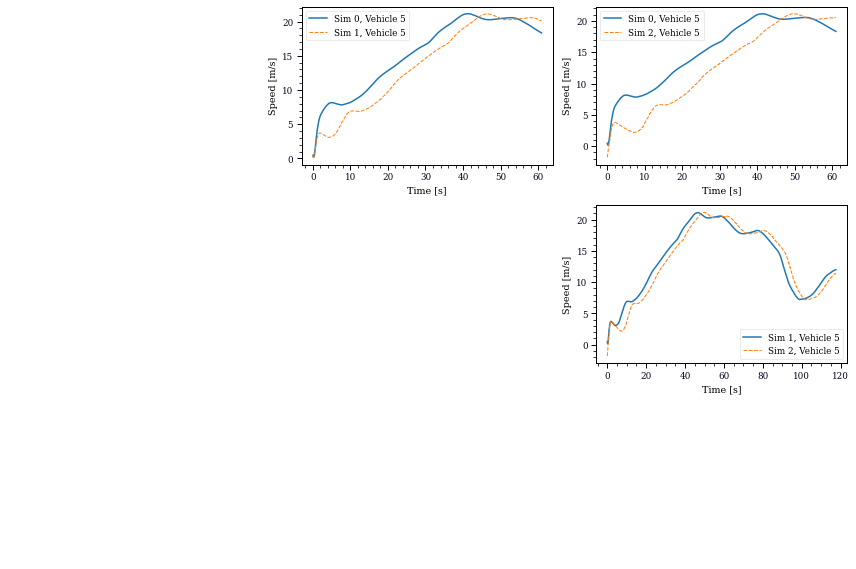

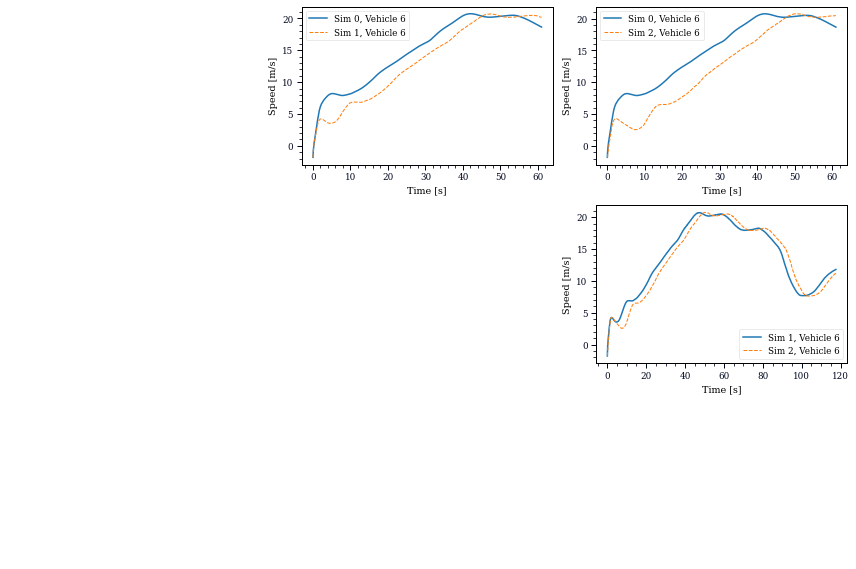

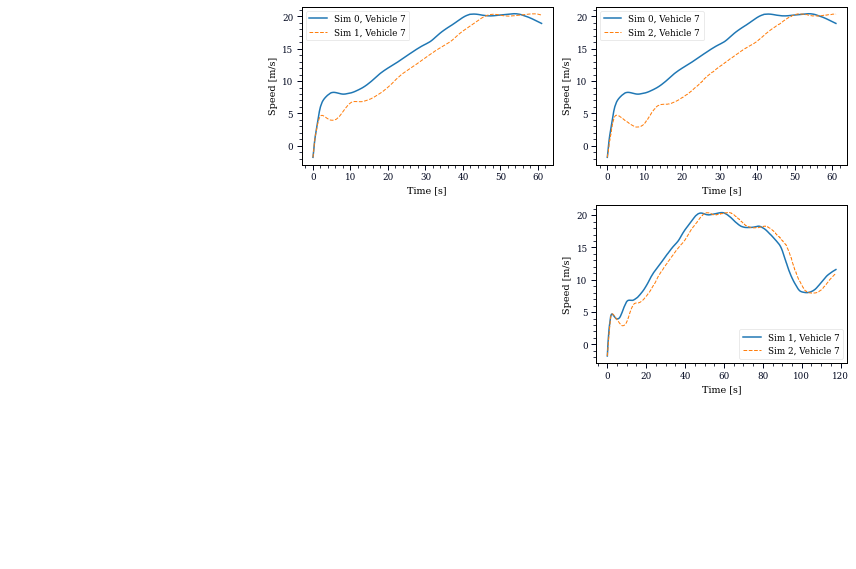

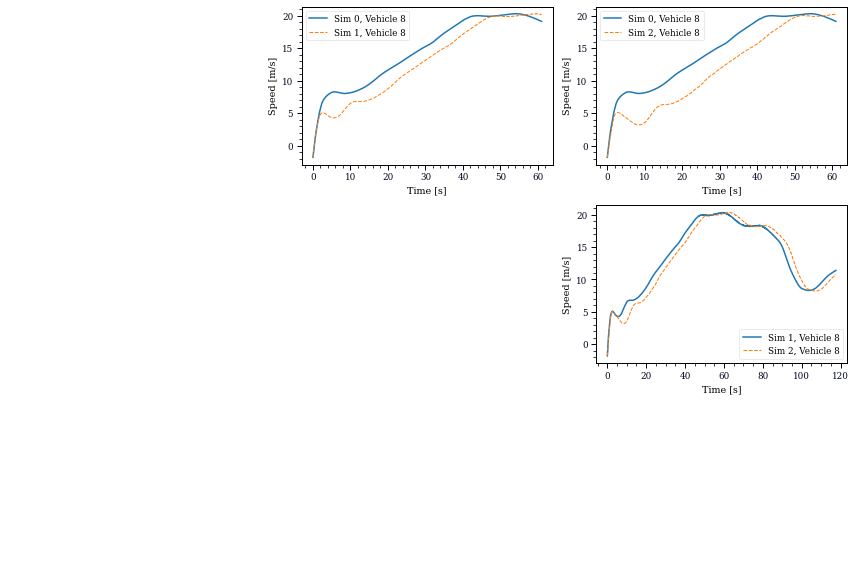

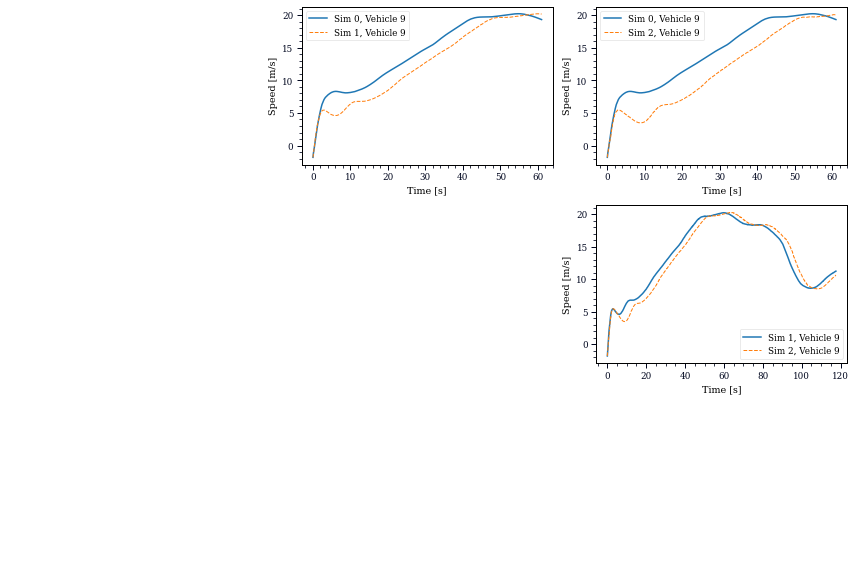

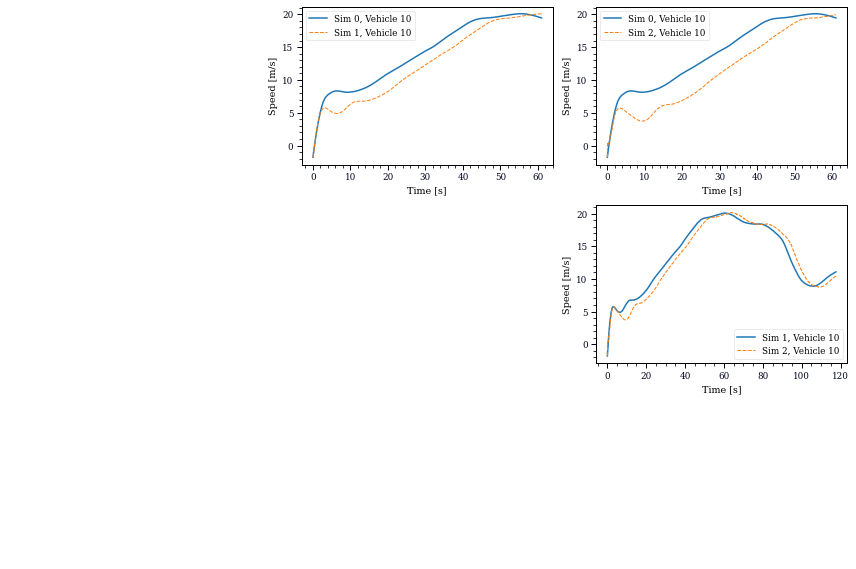

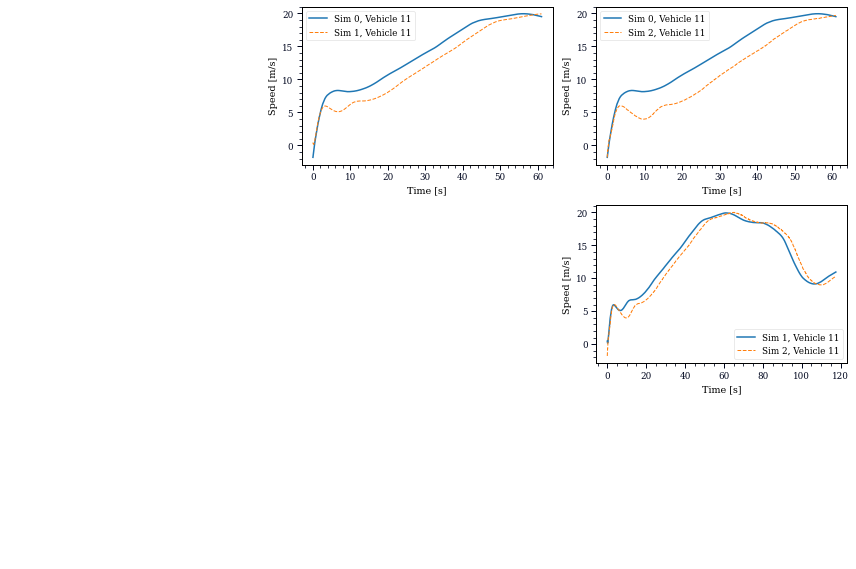

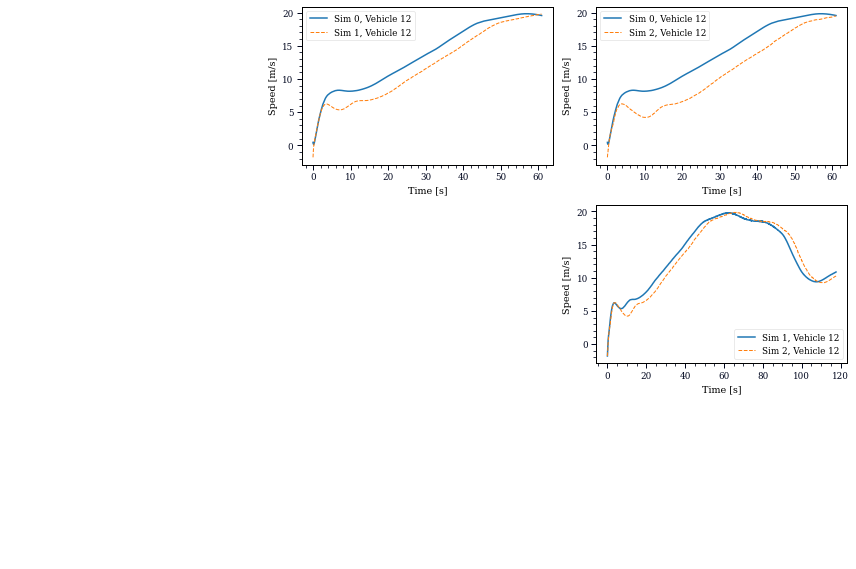

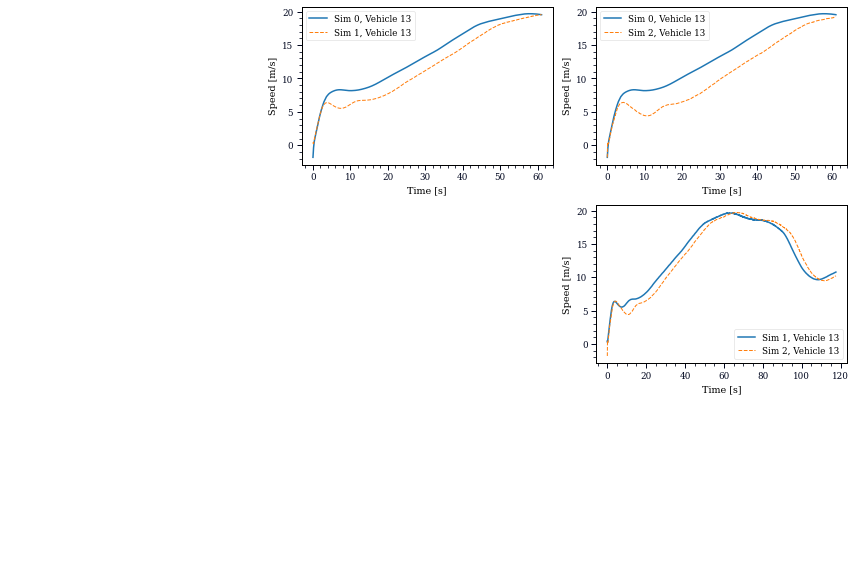

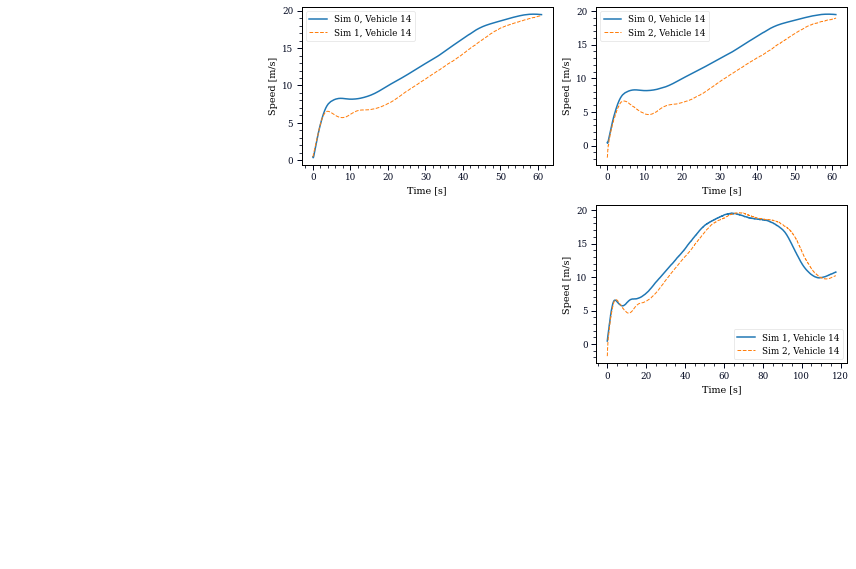

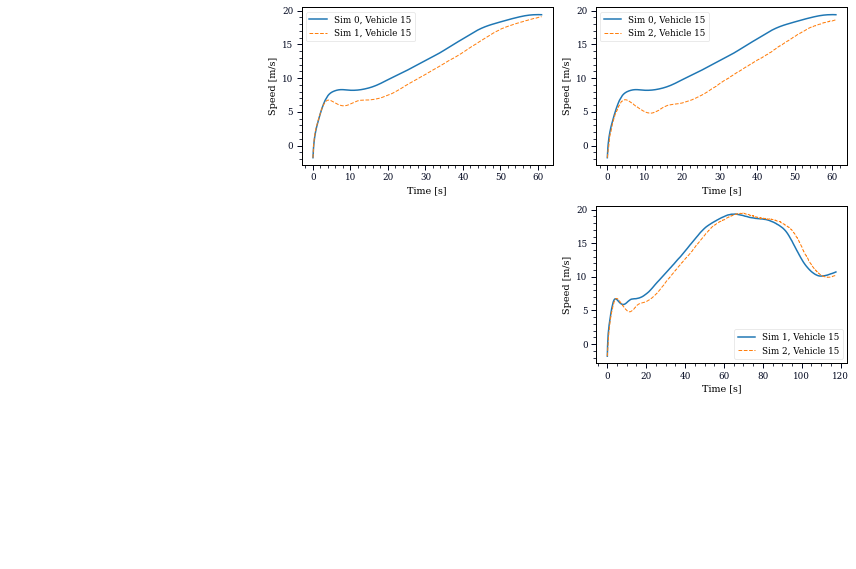

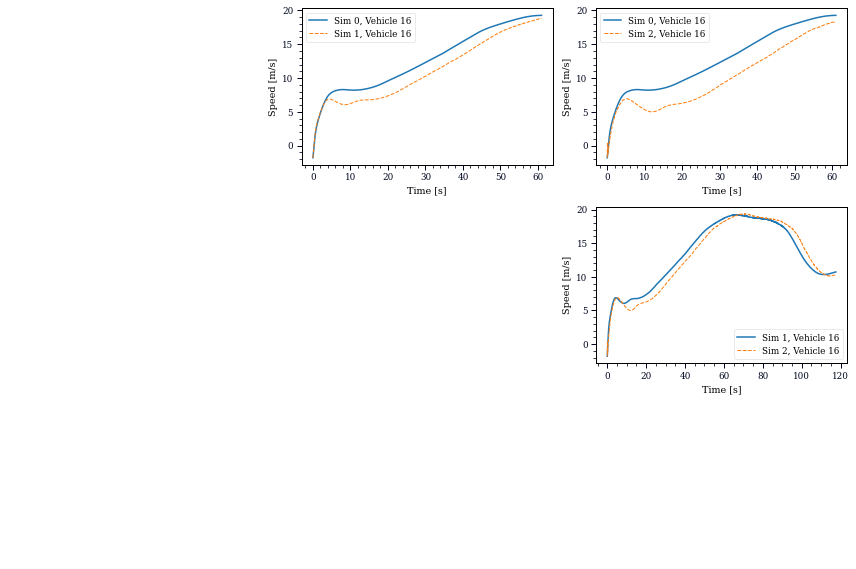

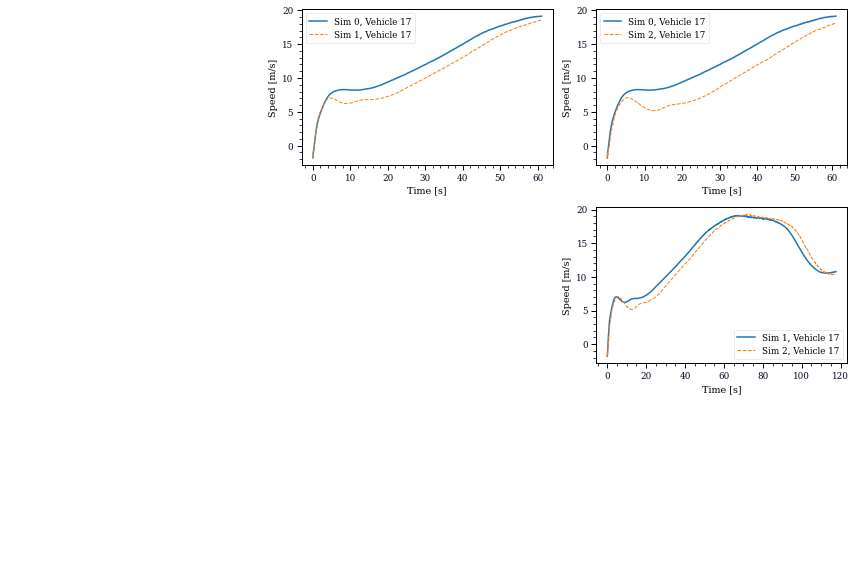

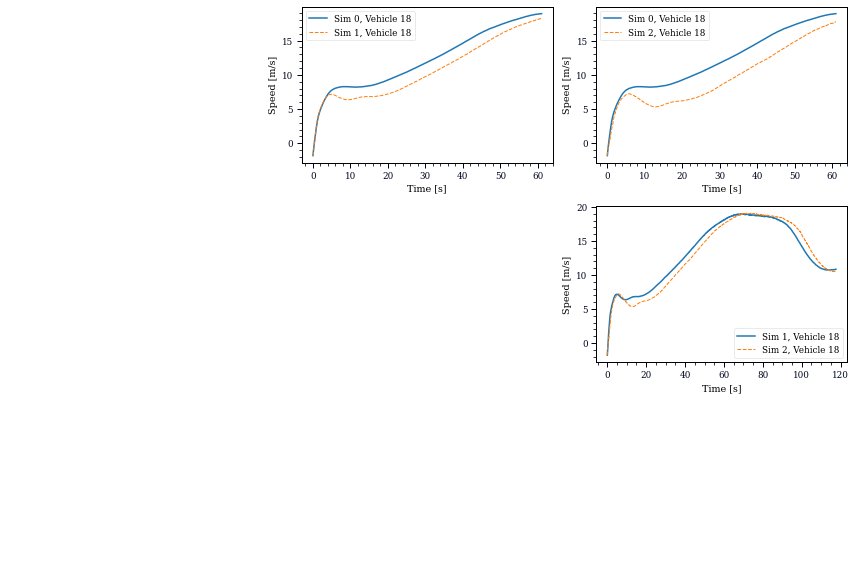

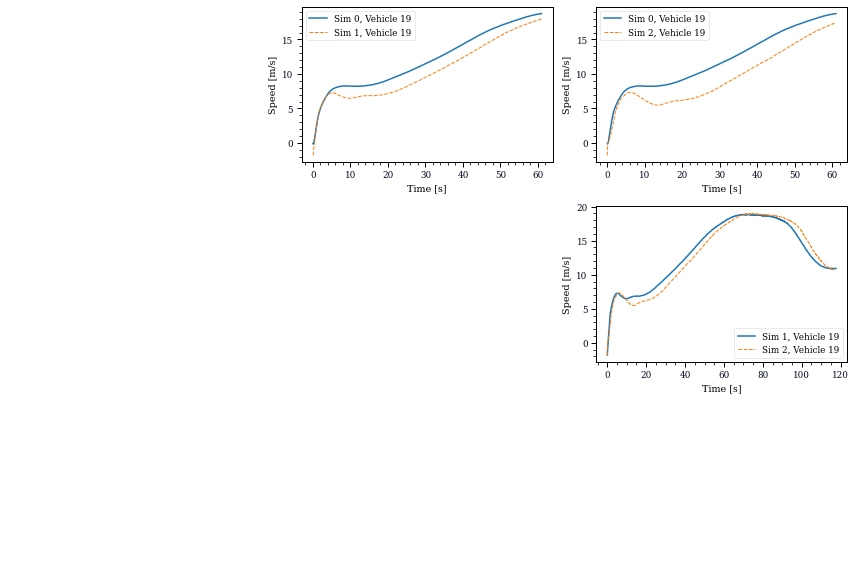

In [21]:
rms_matrix_speed  = calc_rms(speed, key = 'linear.x' , overlap_plots = True)